In [1]:
#%matplotlib ipympl

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [16]:
def rosenbrock(x_1, x_2):
    return 100 * (x_2 - x_1**2)**2 + (1 - x_1)**2

def rosenbrock_grad(x_1, x_2):
    return np.array([-400 * x_1 * (x_2 - x_1**2) - 2 * (1 - x_1), 200 * (x_2 - x_1**2)])

def rosenbrock_hess(x_1, x_2):
    return np.array([[-400 * x_2 + 1200 * x_1**2 + 2, -400 * x_1], [-400 * x_1, 200]])

def p(x_1, x_2, method='steepest descent'):
    grad_1, grad_2 = rosenbrock_grad(x_1, x_2)
    if method == 'steepest descent':
        nrm = np.linalg.norm(np.array([grad_1, grad_2]))
        return -1*np.array([grad_1, grad_2]) / nrm
    if method == 'newton':
        hessian = rosenbrock_hess(x_1, x_2)
        return -np.dot(np.linalg.inv(hessian), np.array([grad_1, grad_2]))

def backtracking_line_search(func, x_k_1, x_k_2, p, rho=0.5, c=1e-4,
                             alpha=1, method='steepest descent'):

    grad_k_1, grad_k_2 = rosenbrock_grad(x_k_1, x_k_2)
    descent = np.dot(np.array([grad_k_1, grad_k_2]), p(x_k_1, x_k_2, method=method))
    while func(x_k_1 + alpha*p(x_k_1, x_k_2)[0], x_k_2 + alpha*p(x_k_1, x_k_2)[1]) >= func(x_k_1, x_k_2) + c*alpha*descent:
        alpha = rho*alpha
    alpha_k = alpha
    return alpha_k

def descent(func, p, x_0_1, x_0_2, alpha, n_iter, method):
    f = []
    x = []
    x_old_1, x_old_2 = x_0_1, x_0_2
    f_old = func(x_0_1, x_0_2)
    x_new_1 = x_old_1 + alpha*p(x_old_1, x_old_2)[0]
    x_new_2 = x_old_2 + alpha*p(x_old_1, x_old_2)[1]
    f_new = func(x_new_1, x_new_2)

    f.append(f_old)
    f.append(f_new)
    x.append((x_old_1, x_old_2))
    x.append((x_new_1, x_new_2))
    for _ in range(n_iter):
        f_new = func(x_new_1, x_new_2)
        x_old_1, x_old_2 = x_new_1, x_new_2
        alpha = backtracking_line_search(func, x_old_1, x_old_2, p,
                                         alpha=alpha, method=method)
        x_new_1 = x_old_1 + alpha*p(x_old_1, x_old_2)[0]
        x_new_2 = x_old_2 + alpha*p(x_old_1, x_old_2)[1]
        f.append(f_new)
        x.append([x_new_1, x_new_2])

    return x, f


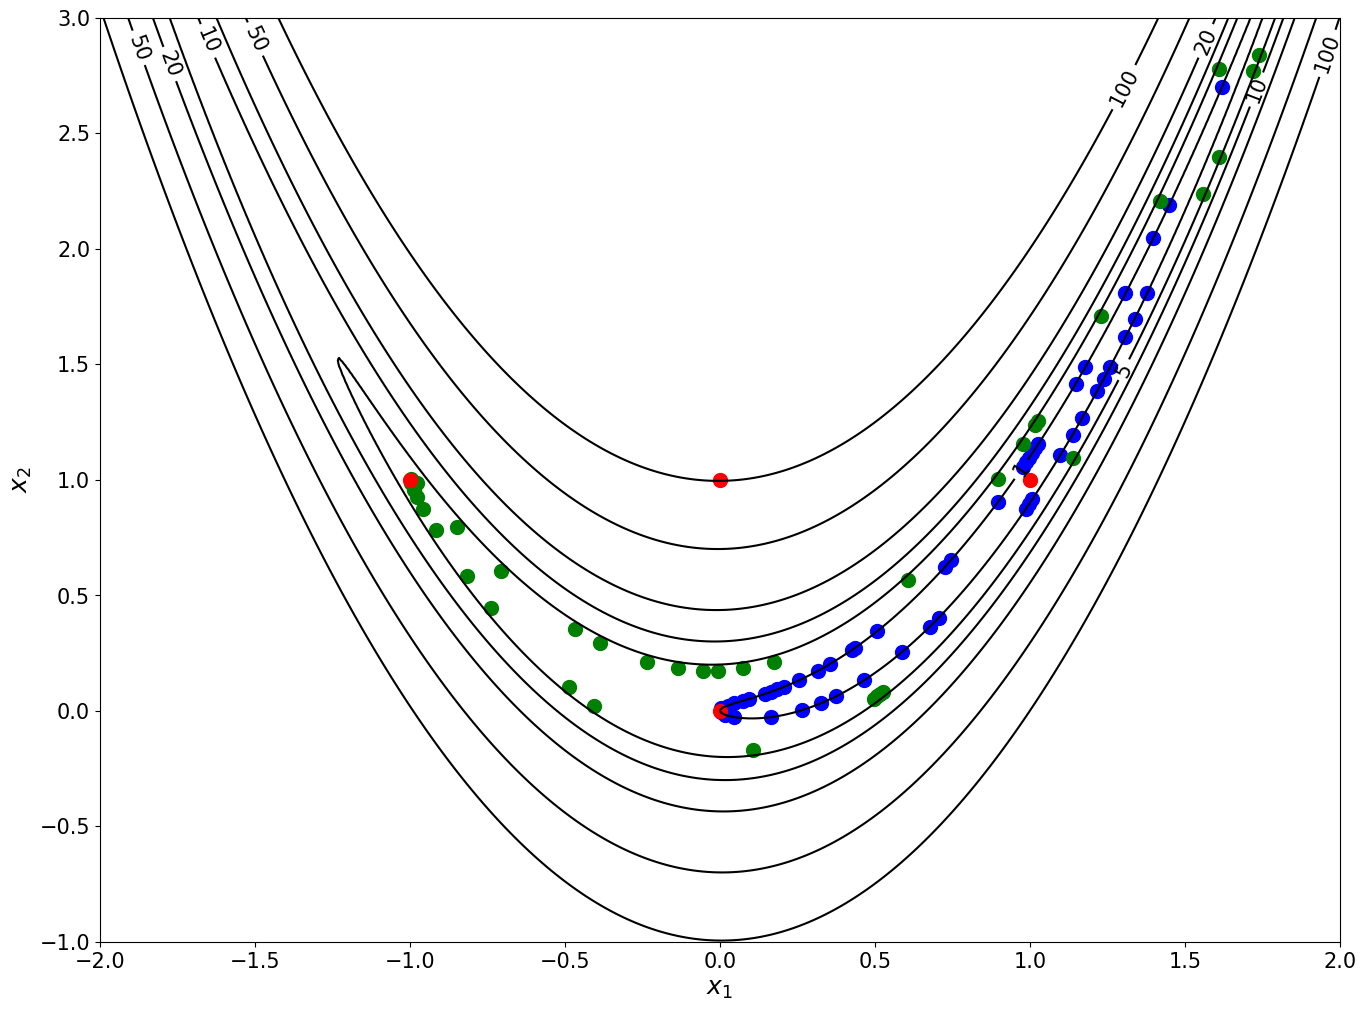

In [4]:
x_values = np.linspace(-2, 2, 400)
y_values = np.linspace(-1, 3, 400)
points_f_1 = [(x, y) for x in x_values for y in y_values if abs(rosenbrock(x, y) - 1) < 0.01]
points_f_4 = [(x, y) for x in x_values for y in y_values if abs(rosenbrock(x, y) - 4) < 0.01]

x_1 = np.linspace(-2, 2, 400)
x_2 = np.linspace(-1, 3, 400)
x_1, x_2 = np.meshgrid(x_1, x_2)

z = rosenbrock(x_1, x_2)
c_values = [1, 5, 10, 20, 50, 100]
fig, ax = plt.subplots(figsize=(16, 12))
CS = ax.contour(x_1, x_2, z, levels=c_values, colors='black')
ax.clabel(CS, inline=True, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(*zip(*points_f_1), s=100, c='blue')  # f(x) = 1
plt.scatter(*zip(*points_f_4), s=100, c='green')  # f(x) = 4
plt.scatter(1, 1, s=100, c='red')
plt.scatter(0, 0, s=100, c='red')
plt.scatter(-1, 1, s=100, c='red')
plt.scatter(0, 1, s=100, c='red')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.show()


In [57]:
def rosenbrock_func(x):

    x_1, x_2 = x
    return 100*(x_2 - x_1**2)**2 + (1-x_1)**2

def backtracking_line_search(func, x_k, p, rho=0.5, c=1e-4,
                             alpha=1, method='steepest descent', verbose=True):
    grad_k = rosenbrock_grad(x_k)
    descent = np.dot(grad_k, p(x_k, method=method))
    while func(x_k + alpha*p(x_k)) >= func(x_k) + c*alpha*descent:
        alpha = rho*alpha
        if verbose:
            print(alpha)
    alpha_k = alpha
    return alpha_k

def rosenbrock_grad(x):
    x_1, x_2 = x
    return np.array([-400*x_1*(x_2-x_1**2)-2*(1-x_1),
                     200*(x_2-x_1**2)])

def rosenbrock_hessian(x):
    x_1, x_2 = x
    return np.array([[-400*x_2 + 1200*x_1**2 + 2, -400*x_1],
                     [-400*x_1, 200]])

def p(x, method='steepest descent'):

    grad = rosenbrock_grad(x)
    if method == 'steepest descent':
        nrm = np.linalg.norm(grad)
        return -1*grad / nrm
    if method == 'newton':
        hessian = rosenbrock_hessian(x)
        return -np.dot(np.linalg.inv(hessian), grad)

def descent(func, p, x_0, alpha, n_iter, method):

    f = []
    x = []
    x_old = x_0
    f_old = func(x_0)
    x_new = x_old + alpha*p(x_old)
    f_new = func(x_new)

    f.append(f_old)
    f.append(f_new)
    x.append(x_old)
    x.append(x_new)
    for _ in range(n_iter):
        f_new = func(x_new)
        x_old = x_new
        alpha = backtracking_line_search(func, x_old, p,
                                         alpha=alpha, method=method)
        x_new = x_old + alpha*p(x_old)
        f.append(f_new)
        x.append(x_new)
    return x, f

x_0 = np.array([-1, 1])
x_values, fun_values = descent(rosenbrock_func, p, x_0, alpha=1,
                               n_iter=10000, method='steepest descent')

0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05
7.62939453125e-06


In [63]:
for i, f in enumerate(fun_values):
    print(f"Iteration {i}: {f}")

Iteration 0: 4
Iteration 1: 101.0
Iteration 2: 101.0
Iteration 3: 0.980101239863517
Iteration 4: 0.7790048295335187
Iteration 5: 0.7487672432382151
Iteration 6: 0.7281119086406248
Iteration 7: 0.7045080495384312
Iteration 8: 0.6853161679863775
Iteration 9: 0.6654768533718889
Iteration 10: 0.648283759542146
Iteration 11: 0.6312266287473083
Iteration 12: 0.6158991384803426
Iteration 13: 0.6010697609400019
Iteration 14: 0.5873566113026697
Iteration 15: 0.5743651074159215
Iteration 16: 0.5620208631030479
Iteration 17: 0.5505690444695702
Iteration 18: 0.5393811543303783
Iteration 19: 0.5292331096237428
Iteration 20: 0.5190241910000355
Iteration 21: 0.5099900872846572
Iteration 22: 0.5006138303155482
Iteration 23: 0.4925391906763929
Iteration 24: 0.4838751346260348
Iteration 25: 0.4766331006558451
Iteration 26: 0.46858181162466583
Iteration 27: 0.46206734309952757
Iteration 28: 0.45454636284139793
Iteration 29: 0.4486718087607675
Iteration 30: 0.4416123743152681
Iteration 31: 0.4363040536530

In [42]:
x_0_1, x_0_2 = 1.2, 1.2
x_values, f_values = descent(rosenbrock, p, x_0_1, x_0_2, alpha=1,
                               n_iter=5000, method='newton')

f_values
# plt.figure(figsize=(16, 12))
# plt.plot(f_values, linewidth=3)
# plt.xlabel('Iteration')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlabel('Iteration', fontsize=20)
# plt.ylabel('f(x)', fontsize=20)
# plt.ylabel('f(x)')
# plt.yscale('log')
# plt.show()

[5.8,
 227.64510824574057,
 227.64510824574057,
 1.672577150934114,
 1.2724056758909352,
 0.04507444195473122,
 0.03412043161677589,
 0.0338360130370239,
 0.03249519809172692,
 0.032202541971436065,
 0.03211071893688028,
 0.032016776654274486,
 0.031924291798983956,
 0.03183171801575366,
 0.03173963403581984,
 0.03164791231051256,
 0.03155645997029215,
 0.03146547025849363,
 0.0313746959920258,
 0.03128440561390607,
 0.031194314637837953,
 0.031104710670838705,
 0.031015298884992874,
 0.030926373016414713,
 0.03083763423064867,
 0.03074937929606043,
 0.030661306895849744,
 0.030573716072521913,
 0.030486303408834785,
 0.030399370023580716,
 0.03031261050490286,
 0.030226327986665698,
 0.030140215100275303,
 0.03005457696742874,
 0.029969104283591615,
 0.029884104139724643,
 0.02979926531171194,
 0.029714896843537748,
 0.02963068560662111,
 0.029546942582441324,
 0.02946335275264766,
 0.02938022902097926,
 0.029297254493803635,
 0.029214743982066676,
 0.029132378731193048,
 0.0290504754

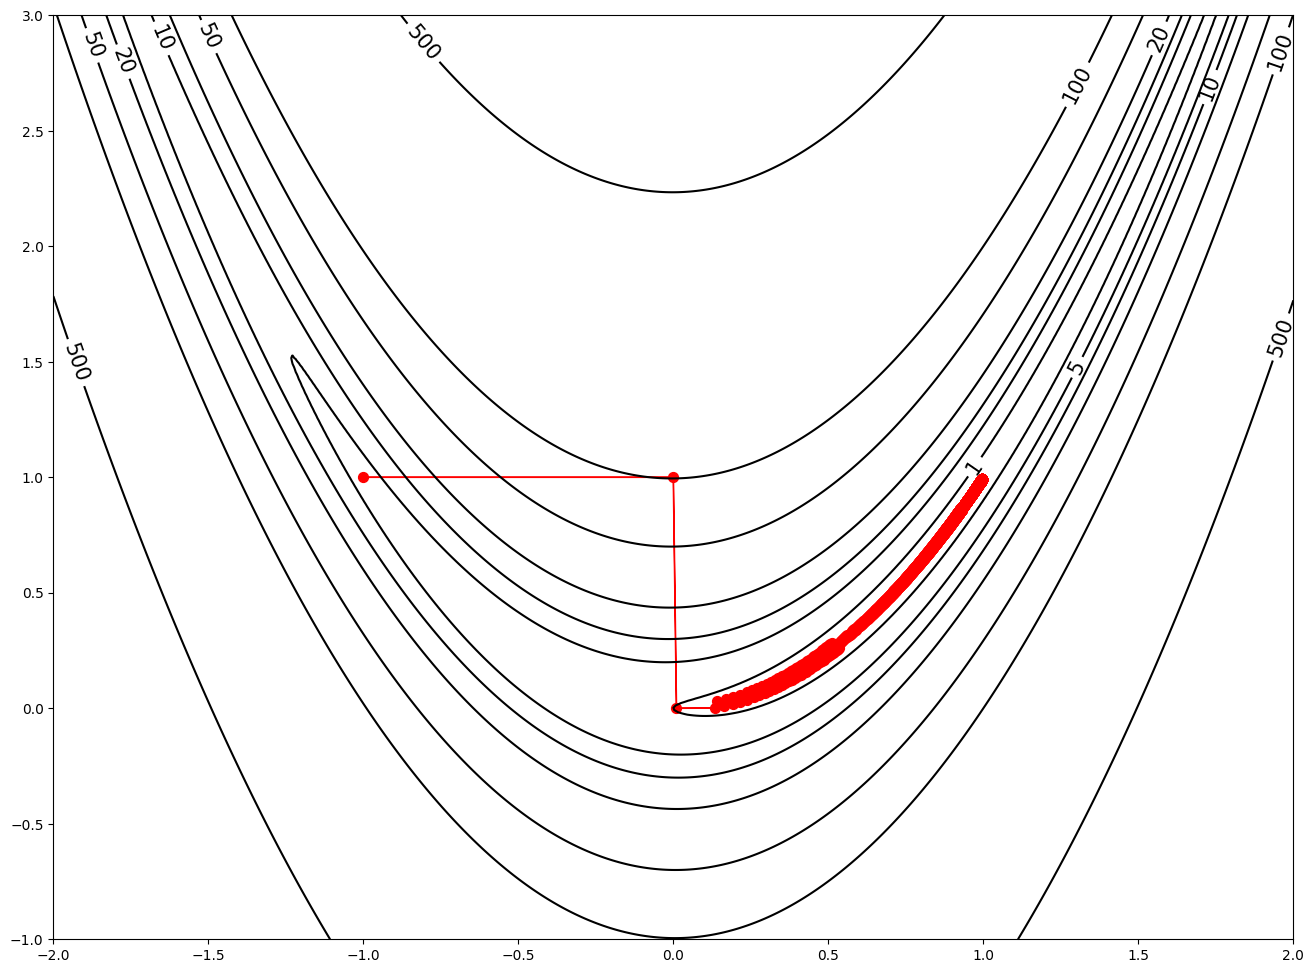

In [37]:
x_start = np.array([-1, 1])
alpha = 1
num_iterations = 5000

#steepest gradient descent
trajectory, _ = descent(rosenbrock, p, x_start[0], x_start[1], alpha, num_iterations, method='newton')

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

c_values = [1, 5, 10, 20, 50, 100, 500]
fig, ax = plt.subplots(figsize=(16, 12))
CS = ax.contour(x_1, x_2, z, levels=c_values, colors='black')
ax.clabel(CS, inline=True, fontsize=15)

for i in range(len(trajectory) - 1):
    plt.scatter(*trajectory[i], s=50, c='red')
    dx = trajectory[i+1][0] - trajectory[i][0]
    dy = trajectory[i+1][1] - trajectory[i][1]
    if i < 3:
        plt.arrow(trajectory[i][0], trajectory[i][1], dx, dy, color='red')

plt.scatter(*trajectory[-1], s=50, c='red')
plt.show()